# Self-Avoiding Paths on Cube (x <---> a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
from itertools import combinations

### Initializing all self-avoiding paths on the cube

In [2]:
# the edges of the cube
cube_edges = ['xb','xe','xf','ab','ay','af','cb','cy','ce','dy','de','df']

In [3]:
# all self-avoiding paths of length 2
a1 = ['x','b','a']; a2 = ['x','f','a'];

In [4]:
# all self-avoiding paths of length 4
a3 = ['x','b','c','y','a'];a4 = ['x','e','d','y','a'];a5 = ['x','e','d','f','a'];a6 = ['x','e','c','y','a'];
a7 = ['x','f','d','y','a'];a8 = ['x','e','c','b','a'];

In [5]:
# all self-avoiding paths of length 6
a9 = ['x','b','c','y','d','f','a'];a10 = ['x','e','d','y','c','b','a'];a11 = ['x','e','c','y','d','f','a'];
a12 = ['x','f','d','e','c','b','a'];a13 = ['x','f','d','e','c','y','a'];a14 = ['x','b','c','e','d','f','a'];
a15 = ['x','f','d','y','c','b','a']; a16 = ['x','b','c','e','d','y','a'];

In [6]:
# combines all self-avoiding paths to a single array
subgraphs = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]

### Converts the self-avoiding paths from vertex labels to edge labels

In [7]:
i = 0 # initialization of i and j to iterate through the subgraphs and elements of each self-avoiding path, respectively
j = 0
for i in range(len(subgraphs)): # iterates through each self-avoidig path
    for j in range(len(subgraphs[i])-1): # iterates through each vertex of the selected self-avoiding path (used -1 to avoid error for a[j+1])
        a = subgraphs[i] # calls the self-avoiding path
        b = a[j] + a[j+1] # combines the j and j+1 vertices to make the edge
        a[j] = b # renames vertex to edge label
    del a[-1] # removes the last term of the resulting edge labels of self-avoiding path since it is just a vertex i.e. 'y'
    i += 1 # moves to next self-avoiding path

    

In [8]:
subgraphs

[['xb', 'ba'],
 ['xf', 'fa'],
 ['xb', 'bc', 'cy', 'ya'],
 ['xe', 'ed', 'dy', 'ya'],
 ['xe', 'ed', 'df', 'fa'],
 ['xe', 'ec', 'cy', 'ya'],
 ['xf', 'fd', 'dy', 'ya'],
 ['xe', 'ec', 'cb', 'ba'],
 ['xb', 'bc', 'cy', 'yd', 'df', 'fa'],
 ['xe', 'ed', 'dy', 'yc', 'cb', 'ba'],
 ['xe', 'ec', 'cy', 'yd', 'df', 'fa'],
 ['xf', 'fd', 'de', 'ec', 'cb', 'ba'],
 ['xf', 'fd', 'de', 'ec', 'cy', 'ya'],
 ['xb', 'bc', 'ce', 'ed', 'df', 'fa'],
 ['xf', 'fd', 'dy', 'yc', 'cb', 'ba'],
 ['xb', 'bc', 'ce', 'ed', 'dy', 'ya']]

### Find intersections of self-avoiding paths

In [9]:
""" function: iterating_paths(subgraphs,path_combinations,results,lengths,combination_size):

    purpose: - take each self-avoiding path, find all combinations of intersections with other self-avoiding paths 
               and yields the resulting intersection set
               
    input: - the subgraph as edge labels for , the number of paths in the intersection set, the results of each intersection set, 
                                the length of each intersection set, and the number of intersections in each intersection set 
                                
    output: - all combinations of intersections, all results of intersecting the self-avoiding paths
                the length of each intersection set i.e. number of edges in each intersection,
                and the number of intersections in the intersection set
"""
def iterating_paths(subgraphs,path_combinations,results,lengths,combination_size):
    comb = list(combinations(subgraphs, path_combinations)) # converts the itertools.combinations into a list
    for k in range(len(comb)): # iterates through the entire combination of paths
        a = list(itertools.chain(*comb[k])) # chains all of the tuples in this list i.e. [['ay'],['cy']] = [['ay','cy']]
    #comb[k] = list(dict.fromkeys(a)) # removes some duplicates e.g. only 'ay' = 'ay' NOT 'ay'='ya'
        b = list(dict.fromkeys(a)) # removes some duplicates e.g. only 'ay' = 'ay' NOT 'ay'='ya'
        # this for loop removes edges duplicates that are reverses e.g. removes 'ay'='ya'
        for c in range(len(b)): 
            edge = b[c] # edge from an intersection
            for i in range(len(b)): # goes through all edges of intersection to find the duplicates
                if edge == b[i] or edge[::-1] == b[i]: # if the edge is duplicated or its reverse is in the intersection
                    b[i] = edge # replaces the duplicated/reverse with the edge
                    i += 1 # goes to next in intersection to find other duplicates
                else:
                    i += 1
        comb[k] = list(dict.fromkeys(b))# has the updated intersection list and assign it to the position in the combinations list
        results.append(comb[k]) # appends the results of the intersection into results array
        lengths.append(len(comb[k])) # appends the lengths of the length of the intersection i.e. number of edges in intersection
        combination_size.append(path_combinations) # appends the number of intersections was used
    #return [comb,len(comb)]


## Main loop to go through all intersections of self-avoiding paths

In [10]:
# Main Loop
results = [] # contains the results of each intersection
lengths = [] # contains the length i.e. number of edges in each intersection
combination_size = [] # contains how many self-avoiding paths were intersected
for j in range(1,17): # goes through the 16 intersections
    path_combinations = j
    iterating_paths(subgraphs,path_combinations,results,lengths,combination_size)

In [11]:
# total number of resulting intersection sets
len(results)

65535

## Creates a dataframe to tally the number of each length

In [12]:
# creating a dataframe to tally the number of certain lengths at a certain combination value
pd_length_values = ['Length_1','Length_2','Length_3','Length_4','Length_5','Length_6','Length_7',
                'Length_8','Length_9','Length_10','Length_11','Length_12'] # since there are 12 edges in the cube
pd_combination_size_values = ['Combination_1','Combination_2','Combination_3','Combination_4','Combination_5',
                              'Combination_6','Combination_7','Combination_8','Combination_9','Combination_10',
                              'Combination_11','Combination_12','Combination_13','Combination_14',
                              'Combination_15','Combination_16'] # since there are 16 edges
# creates the dataframe with changing all NaNs to 0s
df_x_a = pd.DataFrame(columns = pd_length_values, index=pd_combination_size_values).fillna(0)
# recall that (0,0) is the left upper most and (13,11) is right lower most
# it goes row-by-column e.g. row 13 column 11

In [13]:
# goes through all the combinations of intesections in the results and tallies the combination and length to dataframe
for k in range(len(results)):
    df_x_a.iloc[combination_size[k]-1,lengths[k]-1] +=1

In [14]:
# copies dataframe to conduct alterations
dataframe = df_x_a.copy()

In [15]:
# multiplies all even intersections by -1. This comes from the intersection-exclusion principle
for i in range(0,16):
    if i % 2 == 0:
        i += 1
    else:
        dataframe[i:i+1] = -1*dataframe[i:i+1]   

In [16]:
# prints resulting dataframe that contains the coefficient of the p power for a given intersection set
print(dataframe)

                Length_1  Length_2  Length_3  Length_4  Length_5  Length_6  \
Combination_1          0         2         0         6         0         8   
Combination_2          0         0         0        -1        -4       -13   
Combination_3          0         0         0         0         0         0   
Combination_4          0         0         0         0         0         0   
Combination_5          0         0         0         0         0         0   
Combination_6          0         0         0         0         0         0   
Combination_7          0         0         0         0         0         0   
Combination_8          0         0         0         0         0         0   
Combination_9          0         0         0         0         0         0   
Combination_10         0         0         0         0         0         0   
Combination_11         0         0         0         0         0         0   
Combination_12         0         0         0         0         0

In [17]:
# adds all values in corresponding column
a = dataframe.sum(axis=0) 
np.savetxt('a_data.dat',a)
print(a)

Length_1       0
Length_2       2
Length_3       0
Length_4       5
Length_5      -4
Length_6      -5
Length_7     -22
Length_8      24
Length_9      62
Length_10   -115
Length_11     68
Length_12    -14
dtype: int64


### Output for Various Values of p

In [18]:
# prints graphs of expected value of wet sites of open cluster C_{x} containing vertex a for various values of p
p_values = []
probability_values = []
for i in range(0,200):
    p = random.random()
    p_values.append(p)
    probability =(a[0]*p + a[1]*(p**2)+ a[2]*(p**3)+ a[3]*(p**4)+ a[4]*(p**5)+ a[5]*(p**6)+ a[6]*(p**7)+ a[7]*(p**8)
                   + a[8]*(p**9)+ a[9]*(p**10)+ a[10]*(p**11)+ a[11]*(p**12))
    probability_values.append(probability)
#print(probability)

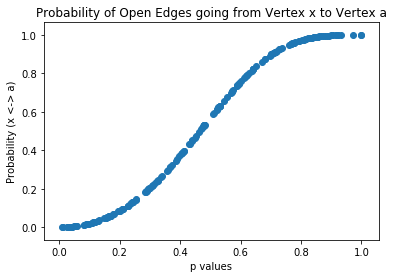

In [19]:
plt.scatter(p_values,probability_values)
plt.title("Probability of Open Edges going from Vertex x to Vertex a")
plt.ylabel("Probability (x <-> a)")
plt.xlabel("p values")
plt.show()